# ASSIGNMENT 4: Clustering the Mushroom Dataset


### Name: Hrsh Dhingra
### Roll no.: 102103443
### Section: CO16


## 1. Data Loading & Exploration


In [2]:
!pip install pandas numpy pycaret ucimlrepo scikit-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 110.7 MB/s eta 0:00:00
   ━━

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the Mushroom dataset
mushroom = fetch_ucirepo(id=73)
# Get the original DataFrame (features + target)
data = mushroom.data.original.copy()
data.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [3]:
# Show data information
data.info()

# Check for missing values represented by '?'
print("\nMissing values represented by '?':")
print(data.isin(['?']).sum())

# Display actual missing values in the DataFrame
print("\nActual missing values (NaN) per column:")
print(data.isnull().sum())

# Check unique values in the target column to confirm it's correct
print("\nUnique values in the 'poisonous' column:")
print(data['poisonous'].unique())

# Show class distribution: edible (e) vs poisonous (p)
print("\nClass distribution (edible = e, poisonous = p):")
print(data['poisonous'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

## 2. Preprocessing


In [4]:
import numpy as np

# Replace '?' with np.nan
data.replace('?', np.nan, inplace=True)

# Impute missing values in 'stalk-root' using mode (most frequent value)
if 'stalk-root' in data.columns:
    data['stalk-root'].fillna(data['stalk-root'].mode()[0], inplace=True)

# Separate features and target (edible/poisonous)
X = data.drop('poisonous', axis=1)
y = data['poisonous']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (8124, 22)
Target shape: (8124,)


>[ASSIGNMENT 4: Clustering the Mushroom Dataset](#scrollTo=5AR9ATP0xqyJ)

>>>[Name: Hrsh Dhingra](#scrollTo=Z0TpTFnHxqyM)

>>>[Roll no.: 102103443](#scrollTo=Z0TpTFnHxqyM)

>>>[Section: CO16](#scrollTo=Z0TpTFnHxqyM)

>>[Data Loading & Exploration](#scrollTo=xMvLQW7IxqyN)

>>[Preprocessing](#scrollTo=6VJypKkmxqyQ)

>>[Encoding Categorical Variables](#scrollTo=HvJCBOU5xqyR)

>>[Clustering Experiments with PyCaret](#scrollTo=XquhQ3m6xqyS)

>>>[4.1 K‑Means Clustering (k = 2)](#scrollTo=qvNV5L6BxqyS)

>>>[4.2 Hierarchical Clustering (2 clusters)](#scrollTo=kgxuea8TxqyU)

>>>[4.3 DBSCAN Clustering](#scrollTo=3LxB7xqcxqyU)

>>[Conclusions](#scrollTo=vXv_6OmXxqyV)



## 3. Encoding Categorical Variables


In [5]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)
print("Encoded features shape:", X_encoded.shape)
X_encoded.head()


Encoded features shape: (8124, 94)


,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## 4. Clustering Experiments with PyCaret


### 4.1 K‑Means Clustering (k = 2)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1267,674.4755,2.2430,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

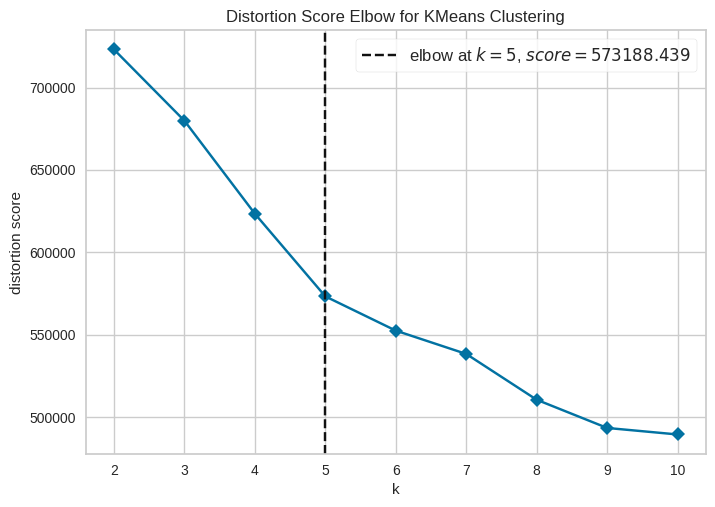

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Cluster,true_class
0,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cluster 0,p
1,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,Cluster 0,e
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,Cluster 0,e
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,Cluster 0,p
4,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,Cluster 0,e


In [6]:
from pycaret.clustering import setup, create_model, plot_model, assign_model

# Initialize clustering setup
clust_km = setup(data=X_encoded, normalize=True, transformation=True, pca=True,
                  session_id=123, verbose=False)
# Create KMeans with 2 clusters
km2 = create_model('kmeans', num_clusters=5)
# Elbow plot for KMeans
plot_model(km2, plot='elbow')
# t-SNE visualization
plot_model(km2, plot='tsne')
# Assign cluster labels
km_results = assign_model(km2)
# Add true class for evaluation
km_results['true_class'] = y.values
km_results.head()


In [7]:
import pandas as pd
# Compare clusters with actual classes
ct_km = pd.crosstab(km_results['Cluster'], km_results['true_class'])
print("Cross-tabulation (KMeans):")
print(ct_km)


Cross-tabulation (KMeans):
true_class     e     p
Cluster               
Cluster 0   2052   816
Cluster 1   1728     0
Cluster 2    236  1760
Cluster 3      0  1296
Cluster 4    192    44


### 4.2 Hierarchical Clustering (2 clusters)


In [8]:
# Create Hierarchical Clustering with 2 clusters
hc2 = create_model('hclust', num_clusters=5)
# t-SNE visualization
plot_model(hc2, plot='tsne')
# Assign and evaluate
hc_results = assign_model(hc2)
hc_results['true_class'] = y.values
hc_results.head()


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1027,701.6746,1.6492,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Cluster,true_class
0,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cluster 0,p
1,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,Cluster 0,e
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,Cluster 0,e
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,Cluster 0,p
4,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,Cluster 0,e


In [9]:
ct_hc = pd.crosstab(hc_results['Cluster'], hc_results['true_class'])
print("Cross-tabulation (Hierarchical):")
print(ct_hc)


Cross-tabulation (Hierarchical):
true_class     e     p
Cluster               
Cluster 0   4016   856
Cluster 1      0  1728
Cluster 2    192     0
Cluster 3      0  1296
Cluster 4      0    36


### 4.3 DBSCAN Clustering


In [10]:
# Create DBSCAN model (parameters may need tuning)
db = create_model('dbscan', eps=0.5, min_samples=5)
# t-SNE visualization
plot_model(db, plot='tsne')
# Assign and evaluate
db_results = assign_model(db)
db_results['true_class'] = y.values
db_results.head()


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Cluster,true_class
0,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cluster -1,p
1,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,Cluster -1,e
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,Cluster -1,e
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,Cluster -1,p
4,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,Cluster -1,e


In [11]:
ct_db = pd.crosstab(db_results['Cluster'], db_results['true_class'])
print("Cross-tabulation (DBSCAN):")
print(ct_db)


Cross-tabulation (DBSCAN):
true_class     e     p
Cluster               
Cluster -1  4208  3916


## 5. Conclusions
- **KMeans (k=2)** clusters broadly separate edible vs. poisonous mushrooms.
- **Hierarchical clustering** shows similar grouping but may capture hierarchical relationships.
- **DBSCAN** identifies core clusters and noise points; parameter tuning can improve separation.
